# oil prices in Kenya

Analyze the trends in oil prices in Kenya from 2010 to 2024 by conducting a comprehensive data analytics process. Begin by defining the problem—understanding the factors influencing oil price fluctuations and their impact on the Kenyan economy. Proceed with data exploration, collecting relevant historical data and examining it for patterns and anomalies. Perform data cleaning to address any inconsistencies or missing values, ensuring the dataset is ready for analysis. Utilize various statistical models and visualization techniques, such as line graphs, histograms, and regression models, to uncover trends, correlations, and predictive insights. Finally, interpret the results to derive actionable insights that can inform policy decisions and future market predictions.

<img src = "https://etimg.etb2bimg.com/photo/72500303.cms" width = 350 height = 200>


Throughout the analysis, employ a structured approach: start with hypothesis generation, then move to data preprocessing, followed by detailed analysis using appropriate models. Visualize the findings through a series of charts and graphs that clearly communicate the trends and key insights. This methodical process will provide a holistic view of the oil price dynamics in Kenya over the 14-year period, highlighting significant shifts and their underlying causes.

## <font color = "gold">read and import the libraries</font>

In [11]:
import os
import pandas as pd
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns
os.listdir()

['.git',
 'data.csv',
 'introduction.ipynb',
 'Kenyan Oil prices.xlsx',
 'README.md',
 'report.docx',
 'text.txt']

In [60]:
df =  pd.read_excel('Kenyan Oil prices.xlsx')
df.head()

,PMS,AGO,DPK,Month,Year,COUNTY,TOWNS,Town,Price Per Barell,Exrates,Date
0,92.53,85.59,74.41,Jan,2011,MOMBASA,MOMBASA,0,89.17,1900-03-21 00:41:52,2011-01-14 00:00:00
1,92.86,85.92,74.74,Jan,2011,0,LIKONI MAINLAND,0,89.17,1900-03-21 00:41:52,2011-01-14 00:00:00
2,92.71,85.77,74.6,Jan,2011,KILIFI,KILIFI,0,89.17,1900-03-21 00:41:52,2011-01-14 00:00:00
3,93.29,86.35,75.18,Jan,2011,0,MALINDI,0,89.17,1900-03-21 00:41:52,2011-01-14 00:00:00
4,92.87,85.93,74.75,Jan,2011,KWALE,KWALE,0,89.17,1900-03-21 00:41:52,2011-01-14 00:00:00


## <font color = "teal">Explore the data</font>

In [61]:
print(df.shape)
print(df.info())


(16893, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16893 entries, 0 to 16892
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PMS               16893 non-null  object 
 1   AGO               16893 non-null  object 
 2   DPK               16893 non-null  object 
 3   Month             16893 non-null  object 
 4   Year              16893 non-null  int64  
 5   COUNTY            16893 non-null  object 
 6   TOWNS             16893 non-null  object 
 7   Town              16893 non-null  object 
 8   Price Per Barell  16893 non-null  float64
 9   Exrates           16893 non-null  object 
 10  Date              16893 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.4+ MB
None


In [62]:
df['PMS'] = pd.to_numeric(df['PMS'],errors = 'coerce')
df['AGO'] = pd.to_numeric(df['AGO'],errors = 'coerce')
df['DPK'] = pd.to_numeric(df['DPK'],errors = 'coerce')
df['Date'] = pd.to_datetime(df['Date'],errors = 'coerce')
df['Year'] = pd.to_numeric(df['Year'],errors = 'coerce')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16893 entries, 0 to 16892
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PMS               16877 non-null  float64       
 1   AGO               16887 non-null  float64       
 2   DPK               16886 non-null  float64       
 3   Month             16893 non-null  object        
 4   Year              16893 non-null  int64         
 5   COUNTY            16893 non-null  object        
 6   TOWNS             16893 non-null  object        
 7   Town              16893 non-null  object        
 8   Price Per Barell  16893 non-null  float64       
 9   Exrates           16893 non-null  object        
 10  Date              15332 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 1.4+ MB


,PMS,AGO,DPK,Year,Price Per Barell,Date
count,16877.000000,16887.000000,16886.000000,16893.000000,16893.000000,15332
mean,140.105029,125.052554,116.226704,2018.944119,64.679676,2018-12-21 12:08:55.350899968
min,11.030000,10.870000,10.210000,2011.000000,0.000000,2011-01-14 00:00:00
25%,107.893723,98.320000,82.854236,2016.000000,45.740000,2015-12-14 00:00:00
50%,118.129006,108.520000,99.980000,2020.000000,67.710000,2020-01-14 00:00:00
75%,175.340000,160.060000,144.050000,2022.000000,92.020000,2022-03-14 00:00:00
max,11790.000000,11370.000000,10718.000000,2024.000000,117.530000,2023-08-14 00:00:00
std,247.732245,169.469514,244.307113,3.796967,32.089730,NaN


## <font color = "cyan"> EDA Analysis </font>

,PMS,AGO,DPK,Month,Year,COUNTY,TOWNS,Town,Price Per Barell,Exrates,Date
16888,199.99,191.60,189.98,Mar,2024,0,0.00,Keumbu,0.0,1899-12-30 00:00:00,NaT
16889,199.66,191.28,189.66,Mar,2024,0,0.00,Marani,0.0,1899-12-30 00:00:00,NaT
16890,200.06,191.67,190.05,Mar,2024,0,0.00,Kerina,0.0,1899-12-30 00:00:00,NaT
16891,199.36,190.97,189.36,Mar,2024,0,0.00,Ikonge,0.0,1899-12-30 00:00:00,NaT
16892,199.79,191.40,189.79,Mar,2024,0,0.00,Nyansiongo,0.0,1899-12-30 00:00:00,NaT


In [40]:
# Filter rows where the 'Date' is before January 1, 2024
y = df[df['Date'] < pd.to_datetime('01/01/2024')]

# Further filter rows where 'TOWNS' is 'NAIROBI'
y = y[y['TOWNS'] == 'NAIROBI']

# Display the last 5 rows of the filtered DataFrame
y.tail()


,PMS,AGO,DPK,Month,Year,COUNTY,TOWNS,Town,Price Per Barell,Exrates,Date
8494,103.95,94.63,83.65,Aug,2020,0,NAIROBI,0,44.28,1900-04-17 03:19:24,2020-08-14
8643,105.43,94.51,83.15,Sep,2020,0,NAIROBI,0,45.74,1900-04-17 09:47:19,2020-09-14
8792,107.27,92.91,83.73,Oct,2020,0,NAIROBI,0,42.35,1900-04-17 15:18:59,2020-10-14
8941,105.85,90.70,81.63,Nov,2020,0,NAIROBI,0,40.16,1900-04-18 06:02:58,2020-11-14
9090,106.82,91.82,83.56,Dec,2020,0,NAIROBI,0,43.04,1900-04-19 14:14:43,2020-12-14


c:\Users\kkama\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kkama\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kkama\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kkama\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

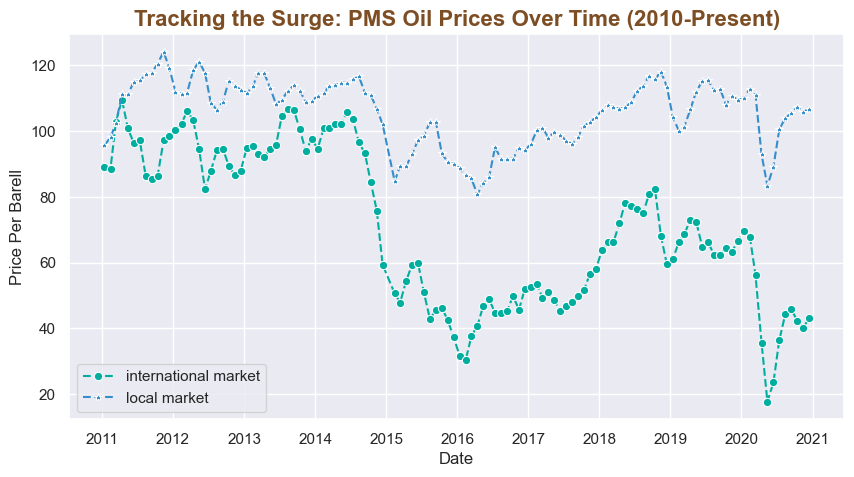

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set a custom theme
sns.set_theme(style="darkgrid")

# Create the plot
plt.figure(figsize=(10, 5))

# Customize the line plot with custom colors
sns.lineplot(data=y, x='Date', y='Price Per Barell', marker='o', linestyle='--', color='#00AE9F',label  ="international market")
sns.lineplot(data=y, x='Date', y='PMS', marker='*', linestyle='--', color='#358eca',label = "local market")

# Add a more interesting title
plt.title("Tracking the Surge: PMS Oil Prices Over Time (2010-Present)", fontsize=16, fontweight='bold', color='#7D4E24')
plt.legend()
# Show the plot|
plt.show()


In [44]:
px.line(y,x = 'Date',y = ['PMS',"AGO","DPK"])

c:\Users\kkama\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [48]:
import plotly.express as px

# Custom colors for the lines
custom_colors = ['#00AE9F', '#E4A307', '#7D4E24']

# Create the line plot
fig = px.line(
    y,
    x='Date',
    y=['PMS', 'AGO', 'DPK'],
    title="Fluctuations in Oil Prices Across Nairobi (2010-2023)",
    color_discrete_sequence=custom_colors,
    template='none'
)

# Customize the line width
fig.update_traces(line=dict(width=3))

# Move the legend to the bottom
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    )
)

# Show the plot
fig.show()



c:\Users\kkama\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# time series modeling

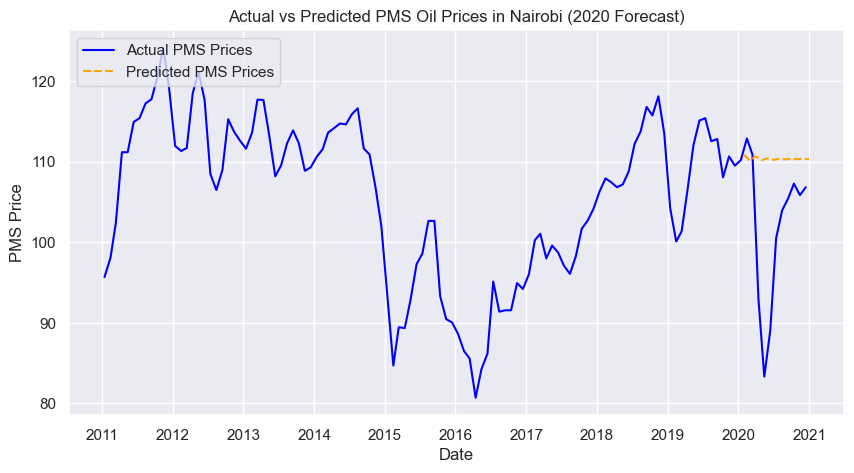

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings;warnings.filterwarnings('ignore')

y = df[df['Date'] < pd.to_datetime('01/01/2024')]
# Ensure the 'Date' column is the datetime type and set it as the index
y = y[y['TOWNS'] == 'NAIROBI']
y.set_index('Date', inplace=True)

# Filter the data to include only dates before 2020
y_train = y[y.index < '2020-01-01']['PMS']

# Fit the ARIMA model (you may need to choose appropriate p, d, q values based on AIC/BIC)
model = ARIMA(y_train, order=(5, 1, 0))  # Example order (p=5, d=1, q=0)
model_fit = model.fit()

# Forecast the next year from 2020
forecast = model_fit.forecast(steps=12)  # Forecasting 12 months (1 year)

# Create a new DataFrame for the predictions
forecast_dates = pd.date_range(start='2020-01-01', periods=12, freq='M')
forecast_df = pd.DataFrame(forecast.values, index=forecast_dates, columns=['PMS_Predicted'])

# Plotting the actual and predicted values
plt.figure(figsize=(10, 5))
plt.plot(y['PMS'], label='Actual PMS Prices', color='blue')
plt.plot(forecast_df, label='Predicted PMS Prices', color='orange', linestyle='--')
plt.title('Actual vs Predicted PMS Oil Prices in Nairobi (2020 Forecast)')
plt.xlabel('Date')
plt.ylabel('PMS Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [56]:
forecast_dates

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
print(df.shape)